In [23]:
import numpy as np
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.base import DirectCell, ReciprocalCell, Coord
from pbcpy.grid import DirectGrid, ReciprocalGrid
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
at = np.identity(3)
at[0,0]=2
nr = [1001,1,1]
at

array([[ 2.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [4]:
grid = DirectGrid(lattice=at, nr=nr)
reciprocal_grid = grid.get_reciprocal() 

In [9]:
reciprocal_grid.lattice

array([[ 3.14159265,  0.        ,  0.        ],
       [ 0.        ,  6.28318531,  0.        ],
       [ 0.        ,  0.        ,  6.28318531]])

In [12]:
g = reciprocal_grid.g
gg = reciprocal_grid.gg

In [77]:
#dr = (grid.s - Coord([0.5,0,0],cell=grid,basis="S"))
dr = (grid.r - grid.r[500,0,0])
dr2 = np.zeros(nr)
for i in range(nr[0]):
    dr2[i,0,0] = np.dot(dr[i,0,0],dr[i,0,0])


In [80]:
alpha = 0.01
dens = 1/(alpha*np.sqrt(2*np.pi))*np.exp(-alpha*dr2/(2*alpha*alpha))
dens.shape

(1001, 1, 1)

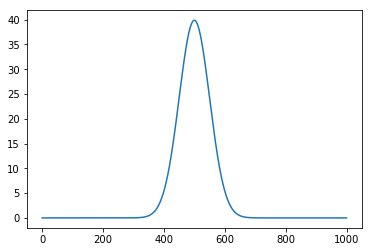

In [81]:
plt.plot(dens[:,0,0])

In [55]:
0.5*0.5

0.25